In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'D:\data science\7)machine learning\projects\classfication logistic & SVM\3)loan\train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#check null
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#delete Null
df = df.dropna()

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#check dublicated
df.duplicated().sum()

0

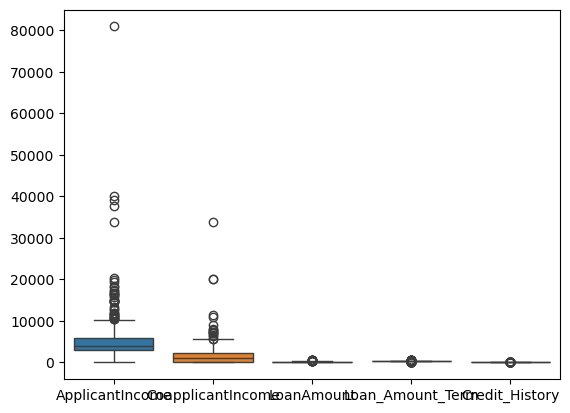

In [11]:
#check outlier

sns.boxplot(df)
plt.show()

In [12]:
#delete Outler IN ApplicantIncome
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
lower_pound=Q1 - 1.5 * IQR
upper_pound=Q3 + 1.5 * IQR
df = df[(df['ApplicantIncome'] >= lower_pound) & (df['ApplicantIncome'] <= upper_pound)]

#يبقي كدا بتحذف الالاوتلاير بس لو حطيت اي اسم متغير تاني يبقي انت كدا هتعرض الاوتلاير df ملحوظه > لو حطيت 

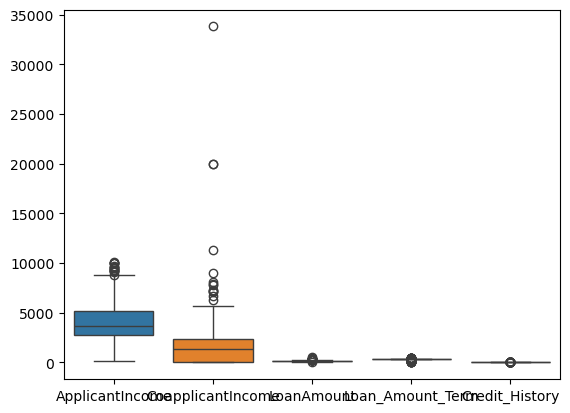

In [13]:
sns.boxplot(df)
plt.show()

In [14]:
df.value_counts().sort_values(ascending=True)

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP001011  Male    Yes      2           Graduate      Yes            5417             4196.0             267.0       360.0             1.0             Urban          Y              1
LP001013  Male    Yes      0           Not Graduate  No             2333             1516.0             95.0        360.0             1.0             Urban          Y              1
LP001014  Male    Yes      3+          Graduate      No             3036             2504.0             158.0       360.0             0.0             Semiurban      N              1
LP001018  Male    Yes      2           Graduate      No             4006             1526.0    

In [ ]:
#convert data to numeric

df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Dependents']=df['Dependents'].replace({'3+':4})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})

df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


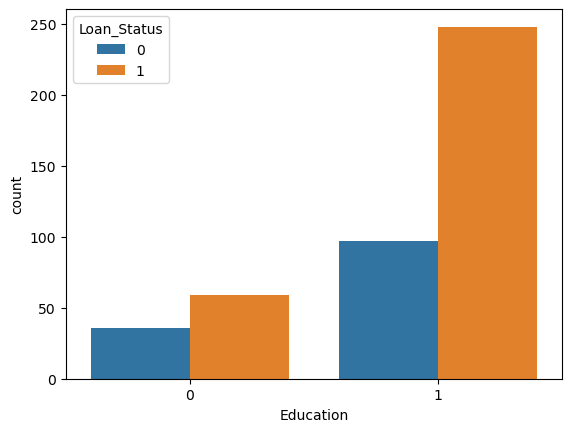

In [17]:
#visulazation data

sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.show()

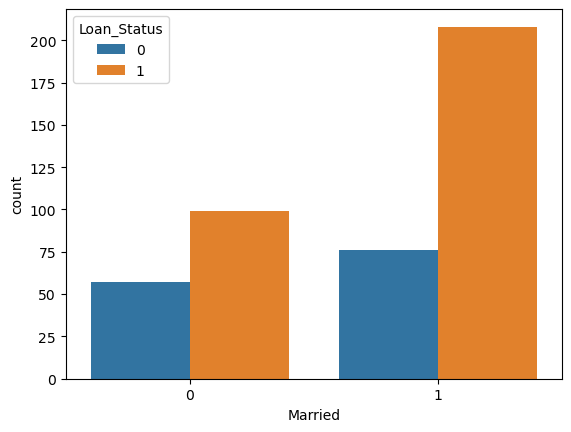

In [18]:
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.show()

In [19]:
print(df.dtypes)


Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


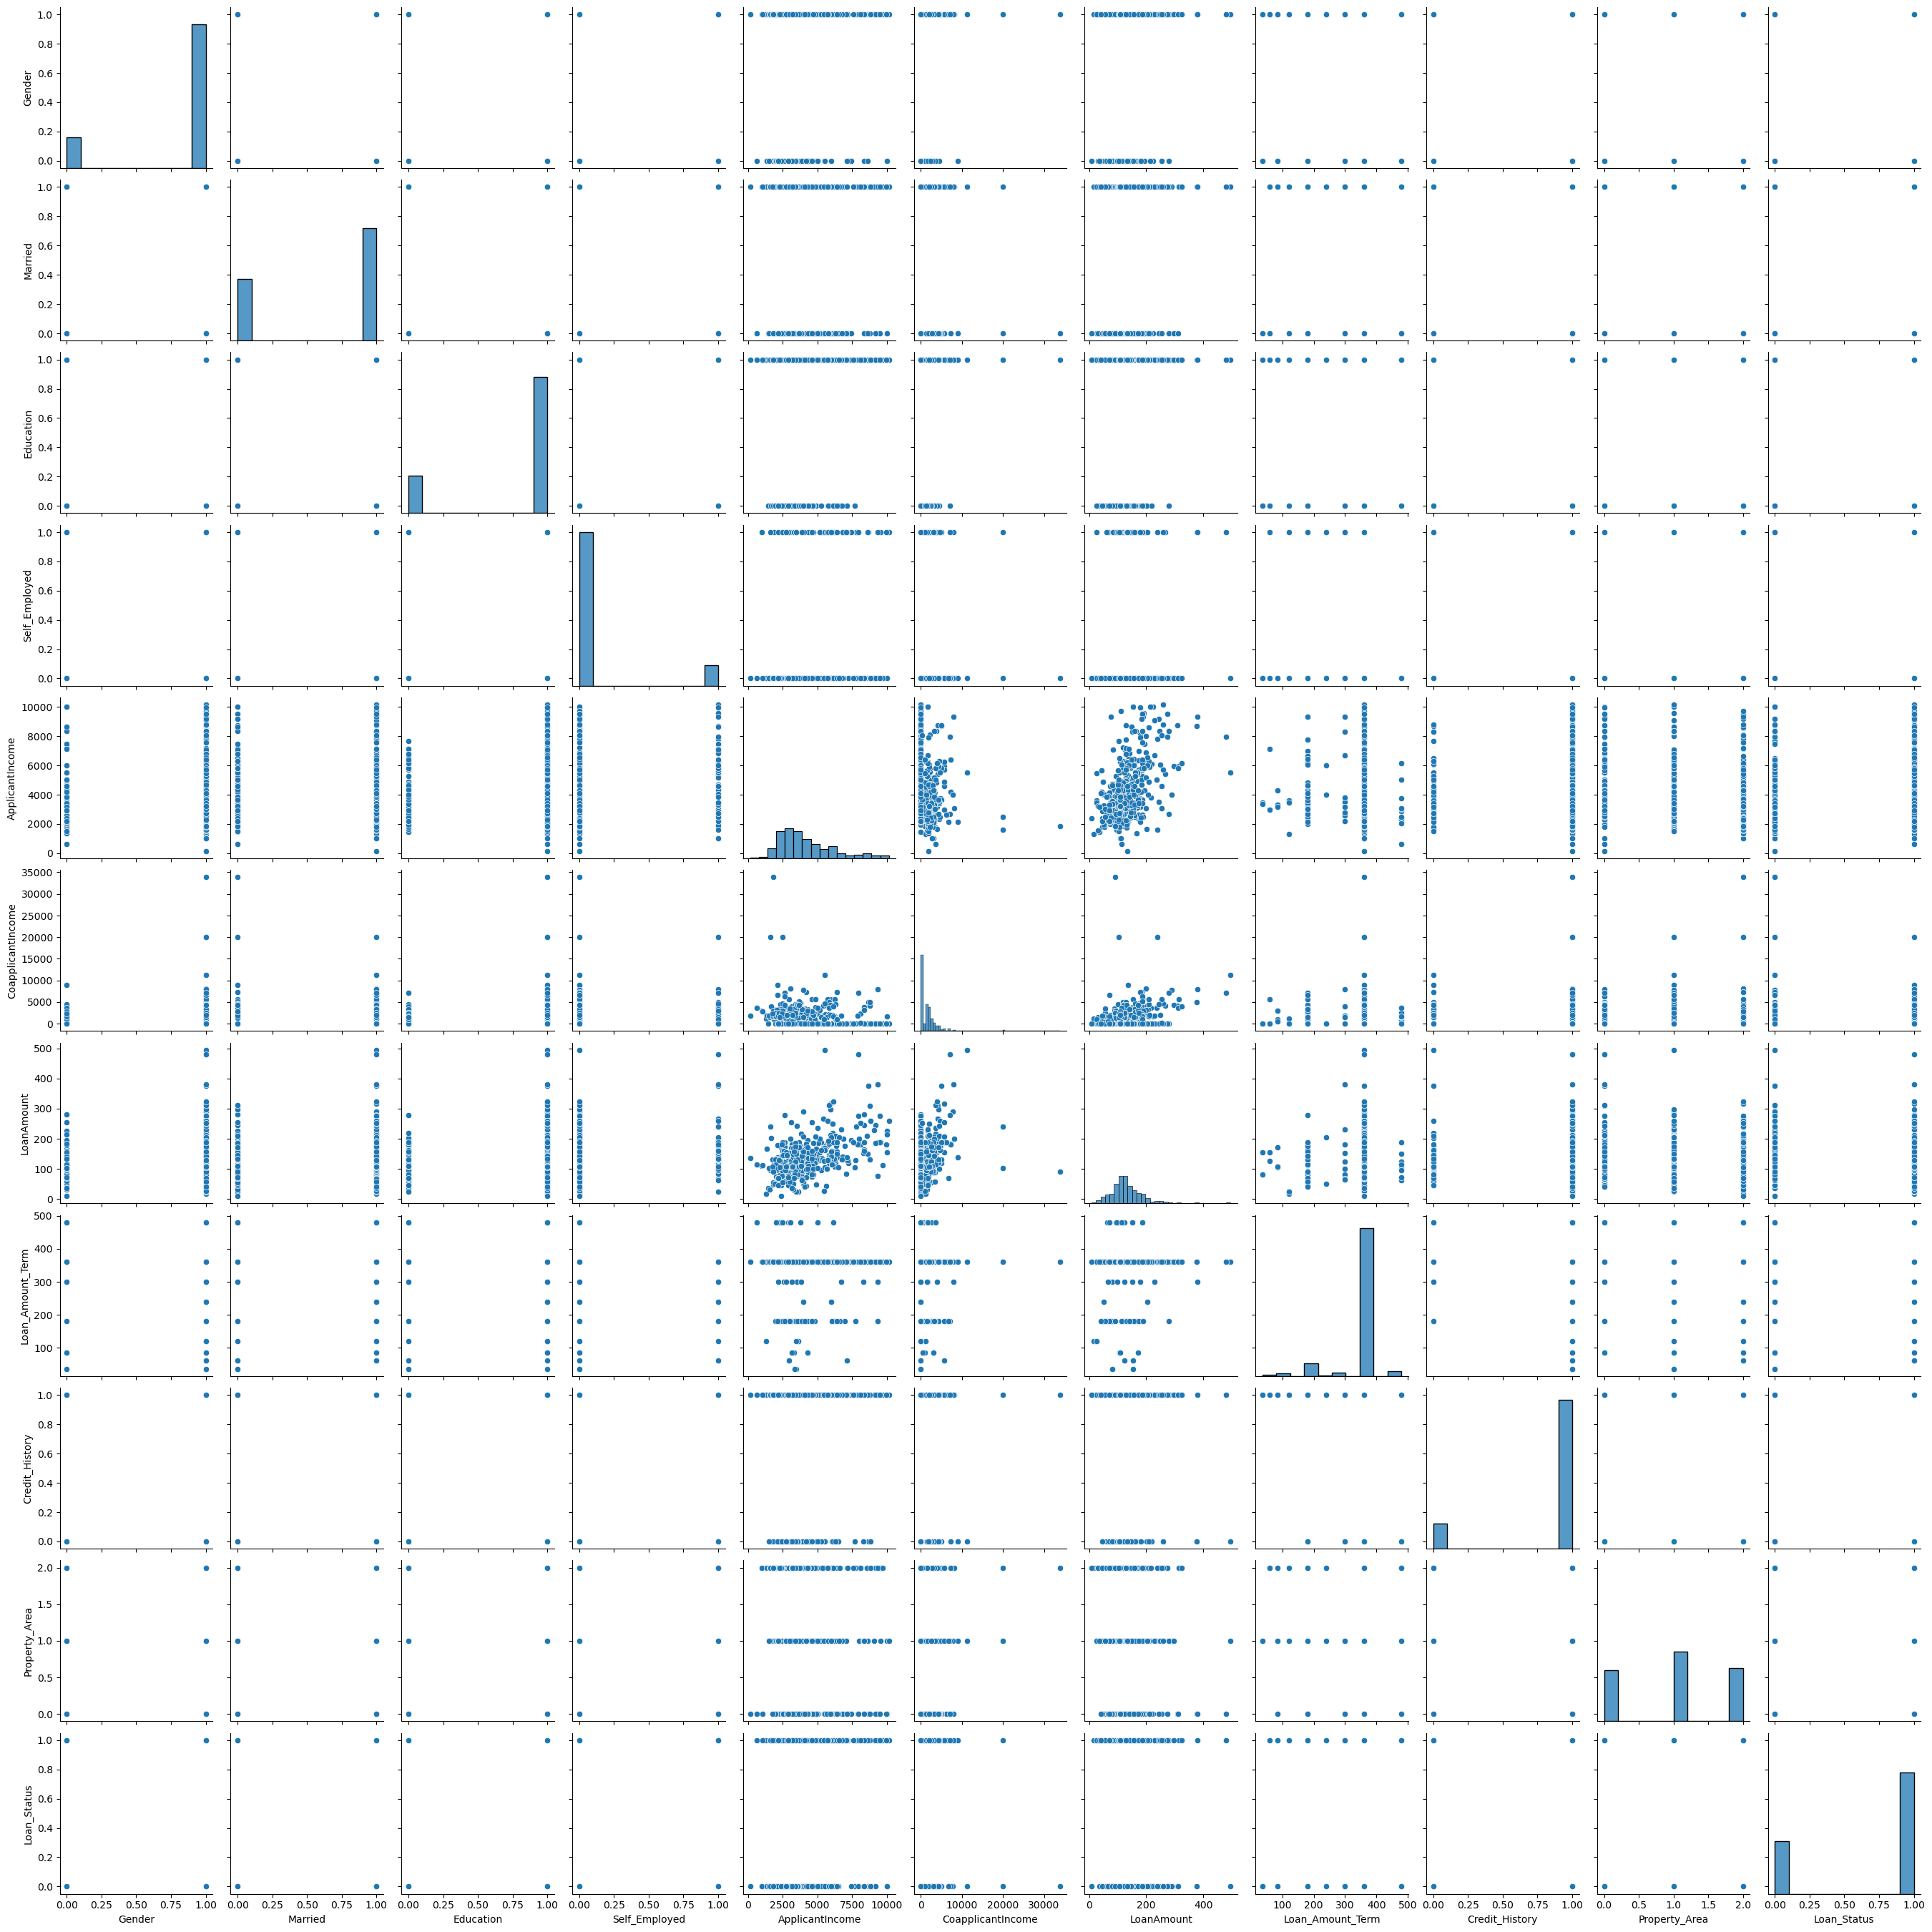

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
#split data
x=df.drop(columns={'Loan_ID','Loan_Status'},axis=1)
y=df['Loan_Status']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.1,stratify=y)

In [22]:
#create model and train

model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [23]:
#accuracy traing set
x_train_pred=model.predict(x_train)
x_train_accuarcy=accuracy_score(x_train_pred,y_train)
x_train_accuarcy

0.8055555555555556

In [24]:
#accuracy test set
x_test_pred=model.predict(x_test)
x_test_accuarcy=accuracy_score(x_test_pred,y_test)
x_test_accuarcy

0.8409090909090909

In [ ]:
#Input Numbers To Check This Model

input_data=(1, 1, 1, 1, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)
input_arr=np.asarray(input_data)
input_reshape = input_arr.reshape(1, -1)
prediction=model.predict(input_reshape)
if (prediction[0]==0):
    print('❌ We regret to inform you that your loan application has not been accepted at this time.')
else:
    print("🎉 Congratulations! " \
    "Your loan application has been successfully accepted. We're excited to be a part of your future plans and wish you all the best! 😊")

🎉 Congratulations! Your loan application has been successfully accepted. We're excited to be a part of your future plans and wish you all the best! 😊


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [52]:
import joblib
joblib.dump(model,'loanokl.pkl')

['loanokl.pkl']